In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.200d.txt
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json



<h1 style="font-family:Times New Roman;font-size:48px;"> <center>📚 Word2vec & GLOVE &amp; A Beginner's Guide </center> </h1>
<p><center style="color:#159364; font-family:cursive;font-size:30px;"> “But there’s a big difference between “impossible” and “hard to imagine.” The first is about it; the second is about you!”
― Marvin Minsky</center></p>

<h1  id="1" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 1 Introduction </h1>
           
 <span style="font-family:Times New Roman; font-size:18px;">In this notebook we will learn about word embeddings and look at the algorithms Word2Vec and Glove which use these word embeddings.  </span>
 
 
 <span style="font-family:Times New Roman; font-size:18px;">In second phase we will use these algorithm to detect the sarcams by using the dataset named as News Headlines Data Set for Sarcasm Detection </span>
 
 

    

<h1  id="2" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  Word Representation </h1>
           
<span style="font-family:Times New Roman; font-size:18px;"> NLP has been revolutionized by deep learning and especially by RNNs and deep RNNs.Word embeddings is a way of representing words. It lets your algorithm automatically understand the analogies between words like "king" and "queen"So far we have defined our language by a vocabulary. Then represented our words with a one-hot vector that represents the word in the vocabulary. 
- An image example would be:
-  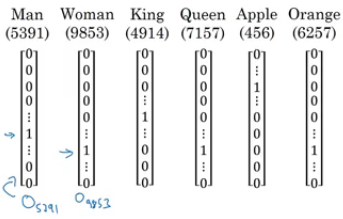
- We will use the annotation O for any word that is represented with one-hot like in the image.
- One of the weaknesses of this representation is that it treats a word as a thing that itself and it doesn't allow an algorithm to generalize across words.
    - For example: "I want a glass of orange ______", a model should predict the next word as juice.
    - A similar example "I want a glass of apple ______", a model won't easily predict juice here if it wasn't trained on it. And if so the two examples aren't related although orange and apple are similar.
 - Inner product between any one-hot encoding vector is zero. Also, the distances between them are the same.
- So, instead of a one-hot presentation, won't it be nice if we can learn a featurized representation with each of these words: man, woman, king, queen, apple, and orange?
- 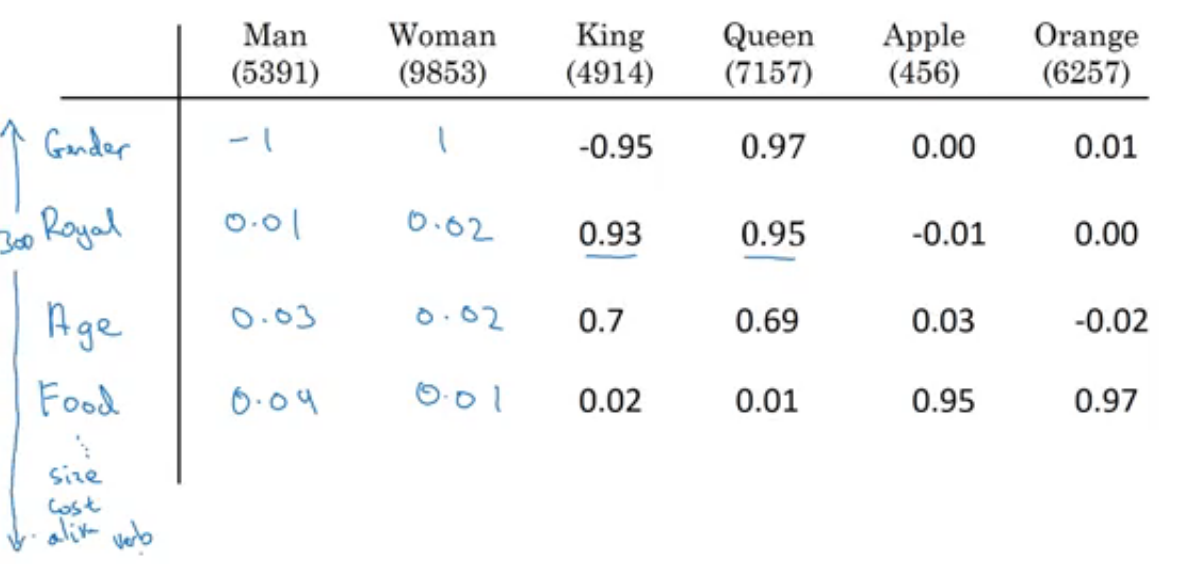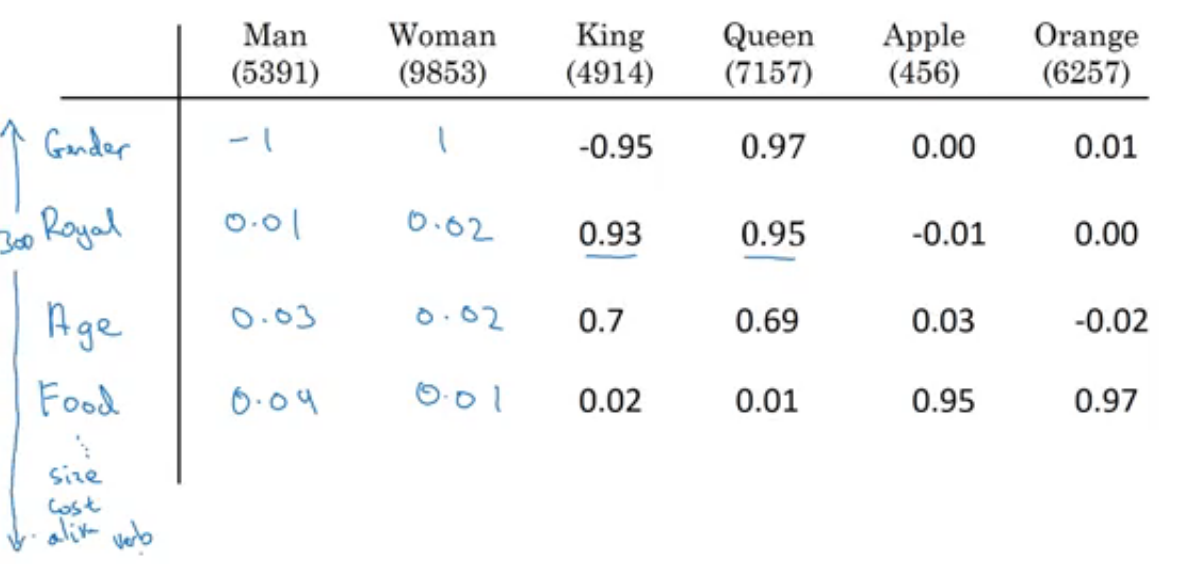
- Each word will have a, for example, 300 features with a type of float point number.
  - Each word column will be a 300-dimensional vector which will be the representation.
  - We will use the notation e5391 to describe man word features vector.
  - Now, if we return to the examples we described again:
    - "I want a glass of orange ______"
    - want a glass of apple ______
  - Orange and apple now share a lot of similar features which makes it easier for an algorithm to generalize between
    them.
  - We call this representation Word embeddings.
- To visualize word embeddings we use a t-SNE algorithm to reduce the features to 2 dimensions which makes it easy to
  visualize:
- ![image](https://user-images.githubusercontent.com/36159918/209144864-9e46756c-a6da-494b-a8c8-53c5cc7b135a.png)
  - You will get a sense that more related words are closer to each other.
- The word embeddings came from that we need to embed a unique vector inside a n-dimensional space.</span>

<h1  id="3" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 3 Use word Embeddings </h1>
           
Let's see how we can take the feature representation we have extracted from each word and apply it in the Named
entity recognition problem.
- Given this example (from named entity recognition):
- ![image](https://user-images.githubusercontent.com/36159918/209145534-620330b1-01b1-413e-a7ce-dbf453aab597.png)
- Sally Johnson is a person's name.
- After training on this sentence the model should find out that the sentence "Robert Lin is an apple farmer" contains
  Robert Lin as a name, as apple and orange have near representations.
- Now if you have tested your model with this sentence "Mahmoud Badry is a durian cultivator" the network should learn
  the name even if it hasn't seen the word durian before (during training). That's the power of word representations.
- The algorithms that are used to learn word embeddings can examine billions of words of unlabeled text - for example,
  100 billion words and learn the representation from them.
- Transfer learning and word embeddings:
  - i. Learn word embeddings from large text corpus (1-100 billion of words).
    - Or download pre-trained embedding online.
  - ii Transfer embedding to new task with the smaller training set (say, 100k words).
  - iii. Optional: continue to finetune the word embeddings with new data.
    - You bother doing this if your smaller training set (from step 2) is big enough.
  - Word embeddings tend to make the biggest difference when the task you're trying to carry out has a relatively smaller
    training set
  - Also, one of the advantages of using word embeddings is that it reduces the size of the input!
    - 10,000 one hot compared to 300 features vector.
  - Word embeddings have an interesting relationship to the face recognition task:
  - ![image](https://user-images.githubusercontent.com/36159918/209146467-630f1840-5fb1-4c20-8ac5-4b396b5246bf.png)
  - In this problem, we encode each face into a vector and then check how similar are these vectors.
  - Words encoding and embeddings have a similar meaning here
- In the word embeddings task, we are learning a representation for each word in our vocabulary (unlike in image
  encoding where we have to map each new image to some n-dimensional vector). We will discuss the algorithm in next
  sections.

<h1  id="4" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  Word2Vec and Glove </h1>
           
           
      ### Properties of word embeddings

- One of the most fascinating properties of word embeddings is that they can also help with analogy reasoning. While
  analogy reasoning may not be by itself the most important NLP application, but it might help convey a sense of what
  these word embeddings can do.
- Analogies example:
  - Given this word embeddings table:
  - ![image](https://user-images.githubusercontent.com/36159918/209147030-c8fa80ac-d789-419a-9803-0cb9abb5d8a1.png)
- Can we conclude this relation:
  - Man ==> Woman
  - King ==> ??
- Lets subtract eMan from eWoman . This will equal the vector [-2 0 0 0]
- Similar eking - eQueen = [-2 0 0 0]
- So the difference is about the gender in both.
  - ![image](https://user-images.githubusercontent.com/36159918/209147468-9d7be30e-be30-4011-a688-c48709ba5519.png)
- This vector represents the gender.
- This drawing is a 2D visualization of the 4D vector that has been extracted by a t-SNE algorithm. It's a drawing
just for visualization. Don't rely on the t-SNE algorithm for finding parallels.

- So we can reformulate the problem to find:
  - eman - eWoman ≈ eking - e??
  - It can also be represented mathematically by:
  - ![image](https://user-images.githubusercontent.com/36159918/209147819-61e8795d-c766-4710-a69a-d0441b24a905.png)
  - It turns out that eQueen is the best solution here that gets the the similar vector

- Cosine similarity - the most commonly used similarity function:
  - Equation:
  - ![image](https://user-images.githubusercontent.com/36159918/209148007-686c81b3-3835-47f0-81a0-ef07ab869d2a.png)

  - CosineSimilarity(u, v) = u . v / ||u|| ||v|| = cos(θ)
  - The top part represents the inner product of u and v vectors. It will be large if the vectors are very similar
- You can also use Euclidean distance as a similarity function (but it rather measures a dissimilarity, so you should take it
  with negative sign).
  
- We can use this equation to calculate the similarities between word embeddings and on the analogy problem where u
- = eW and v = eking - eMan + eWoman


### Embedding matrix
- When you implement an algorithm to learn a word embedding, what you end up learning is a embedding matrix.
- Let's take an example:
  - Suppose we are using 10,000 words as our vocabulary (plus token).
  - The algorithm should create a matrix E of the shape (300, 10000) in case we are extracting 300 features.
  - ![image](https://user-images.githubusercontent.com/36159918/209148784-352886b5-1c6d-4746-8c49-2da7daa6fe07.png)
  - If O6257 is the one hot encoding of the word orange of shape (10000, 1), then
  - np.dot( E ,O6257 ) = e6257 which shape is (300, 1).
  - Generally np.dot( E , O ) =ej
- In the next sections, you will see that we first initialize E randomly and then try to learn all the parameters of this
  matrix.
- In practice it's not efficient to use a dot multiplication when you are trying to extract the embeddings of a specific word,
  instead, we will use slicing to slice a specific column. In Keras there is an embedding layer that extracts this column with
   no multiplication.
   


## Learning Word Embeddings: Word2vec & GloVe\

### Learning word embeddings

- Let's start learning some algorithms that can learn word embeddings.
- At the start, word embeddings algorithms were complex but then they got simpler and simpler.
- We will start by learning the complex examples to make more intuition.
- Neural language model:
  - Let's start with an example:
  - ![image](https://user-images.githubusercontent.com/36159918/209150694-ab93d4e6-d78a-482d-8cf9-efbbcbf4e036.png)
  - We want to build a language model so that we can predict the next word.
  - So we use this neural network to learn the language model
  - ![image](https://user-images.githubusercontent.com/36159918/209150993-32b0a026-29d2-4c70-adc0-bb20d0ce89ae.png)
  - We get e by np.dot( E ,o<sub>j</sub>)
  - NN layer has parameters W1 and b1 while softmax layer has parameters W2 and b2
  - Input dimension is (300*6, 1) if the window size is 6 (six previous words).
  - Here we are optimizing E matrix and layers parameters. We need to maximize the likelihood to predict the
    next word given the context (previous words).
- This model was build in 2003 and tends to work pretty decent for learning word embeddings.
- In the last example we took a window of 6 words that fall behind the word that we want to predict. There are other
  choices when we are trying to learn word embeddings.
- Suppose we have an example: "I want a glass of orange juice to go along with my cereal"
- To learn juice, choices of context are:
  - a. Last 4 words.
    - We use a window of last 4 words (4 is a hyperparameter), "a glass of orange" and try to predict the next
      word from it.
  - b 4 words on the left and on the right
    - "a glass of orange" and "to go along with"
  - c. Last 1 word.
    - "orange"
  - d. Nearby 1 word.
    - "glass" word is near juice.
    - This is the idea of skip grams model.
    - The idea is much simpler and works remarkably well.
    - We will talk about this in the next section.
- Researchers found that if you really want to build a language model, it's natural to use the last few words as a context.
  But if your main goal is really to learn a word embedding, then you can use all of these other contexts and they will result
  in very meaningful work embeddings as well.
- To summarize, the language modeling problem poses a machines learning problem where you input the context (like
  the last four words) and predict some target words. And posing that problem allows you to learn good word
  embeddings.
- Word2Vec
  - Before presenting Word2Vec, lets talk about **skip-grams**:
  - For example, we have the sentence: "I want a glass of orange juice to go along with my cereal"
  - We will choose context and target.
  - The target is chosen randomly based on a window with a specific size
  - ![word2vec](https://user-images.githubusercontent.com/36159918/209152916-d5244811-4820-4686-9f4e-c00f6ec8b449.PNG)
  - We have converted the problem into a supervised problem.
  - This is not an easy learning problem because learning within -10/+10 words (10 - an example) is hard
  - We want to learn this to get our word embeddings model.
 ## Word2Vec model:
  - Vocabulary size = 10,000 words
  - Let's say that the context word are c and the target word is t
  - We want to learn c to t
  - We get e by E . oc
  - We then use a softmax layer to get P(t|c) which is ŷ
  - Also we will use the cross-entropy loss function.
  - This model is called skip-grams model.
- The last model has a problem with the softmax layer:
   - ![image](https://user-images.githubusercontent.com/36159918/209153514-cccbf91b-66fe-4bf6-a963-b8b6ec87d964.png)
   - Here we are summing 10,000 numbers which corresponds to the number of words in our vocabulary.
   - If this number is larger say 1 million, the computation will become very slow.
   - One of the solutions for the last problem is to use "Hierarchical softmax classifier" which works as a tree classifier.
   - ![image](https://user-images.githubusercontent.com/36159918/209153740-de2dc402-fd0e-4ba9-a0a7-7c37d94516a0.png)

- In practice, the hierarchical softmax classifier doesn't use a balanced tree like the drawn one. Common words are at the
top and less common are at the bottom.
- How to sample the context c?
  - One way is to choose the context by random from your corpus.
  - If you have done it that way, there will be frequent words like "the, of, a, and, to, .." that can dominate other words
    like "orange, apple, durian,..."
  - In practice, we don't take the context uniformly random, instead there are some heuristics to balance the common
    words and the non-common words.
- word2vec paper includes 2 ideas of learning word embeddings. One is skip-gram model and another is CBoW
  (continuous bag-of-words).


## Negative Sampling
- Negative sampling allows you to do something similar to the skip-gram model, but with a much more efficient learning
algorithm. We will create a different learning problem.
- Given this example:
  - "I want a glass of orange juice to go along with my cereal"
- The sampling will look like this:
- ![NegativeSampling](https://user-images.githubusercontent.com/36159918/209156368-d1591848-3b2c-4889-8534-bef0eb339cdc.PNG)
- We get positive example by using the same skip-grams technique, with a fixed window that goes around.
- To generate a negative example, we pick a word randomly from the vocabulary.
- Notice, that we got word "of" as a negative example although it appeared in the same sentence.
- So the steps to generate the samples are:
  - i. Pick a positive context
  - ii. Pick a k negative contexts from the dictionary.
- k is recommended to be from 5 to 20 in small datasets. For larger ones - 2 to 5.
- We will have a ratio of k negative examples to 1 positive ones in the data we are collecting.
- Now let's define the model that will learn this supervised learning problem:
  - Lets say that the context word are c and the word are t and y is the target.
  - We will apply the simple logistic regression model.
  - ![image](https://user-images.githubusercontent.com/36159918/209156947-bd98437f-c68c-43a3-bce7-64d3903e1fdb.png)

 - The logistic regression model can be drawn like this:
 - ![image](https://user-images.githubusercontent.com/36159918/209156998-c7342b4f-87d3-4c31-a84b-3148e1b0a0cc.png)

 - So we are like having 10,000 binary classification problems, and we only train k+1 classifier of them in each
   iteration.
 - How to select negative samples:
 - We can sample according to empirical frequencies in words corpus which means according to how often different
  words appears. But the problem with that is that we will have more frequent words like the, of, and...
- The best is to sample with this equation (according to authors):
  - ![image](https://user-images.githubusercontent.com/36159918/209157231-dec91a71-8716-4096-aca9-ef27f91d6fb6.png)

### GloVe word vectors
- GloVe is another algorithm for learning the word embedding. It's the simplest of them.
- This is not used as much as word2vec or skip-gram models, but it has some enthusiasts because of its simplicity.
- GloVe stands for Global vectors for word representation.
- Let's use our previous example: "I want a glass of orange juice to go along with my cereal".
- We will choose a context and a target from the choices we have mentioned in the previous sections
- Then we will calculate this for every pair: X = # times t appears in context of c
- X = X if we choose a window pair, but they will not equal if we choose the previous words for example. In GloVe they
use a window which means they are equal
- The model is defined like this:
  - ![image](https://user-images.githubusercontent.com/36159918/209157622-6d958779-61c9-4e72-aadb-1405365a0745.png)

- f(x) - the weighting term, used for many reasons which include:
  - The log(0) problem, which might occur if there are no pairs for the given target and context values.
  - Giving not too much weight for stop words like "is", "the", and "this" which occur many times.
  - Giving not too little weight for infrequent words.
- Theta and e are symmetric which helps getting the final word embedding.
- Conclusions on word embeddings:
  - If this is your first try, you should try to download a pre-trained model that has been made and actually works best.
  - If you have enough data, you can try to implement one of the available algorithms.
  - Because word embeddings are very computationally expensive to train, most ML practitioners will load a pretrained
    set of embeddings.
  - A final note that you can't guarantee that the axis used to represent the features will be well-aligned with what
    might be easily humanly interpretable axis like gender, royal, age.

<h1  id="4" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 4
    Importing some Libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

<h1  id="5" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 5 Loading Data Sets </h1>
           
           
           

In [2]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


<h1  id="6" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  Data Visualisation and Pre Processing</h1>
           
           
           

In [3]:
df.isna().sum() # Checking for NaN values

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [4]:
del df['article_link'] 

In [5]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

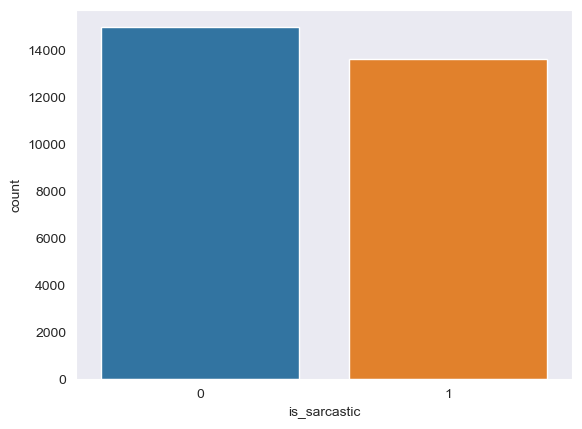

In [6]:
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

**StopWords**

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment

In [7]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**Basic Data Cleaning**



In [8]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


**WORDCLOUD FOR TEXT THAT IS NOT SARCASTIC (LABEL - 0)**

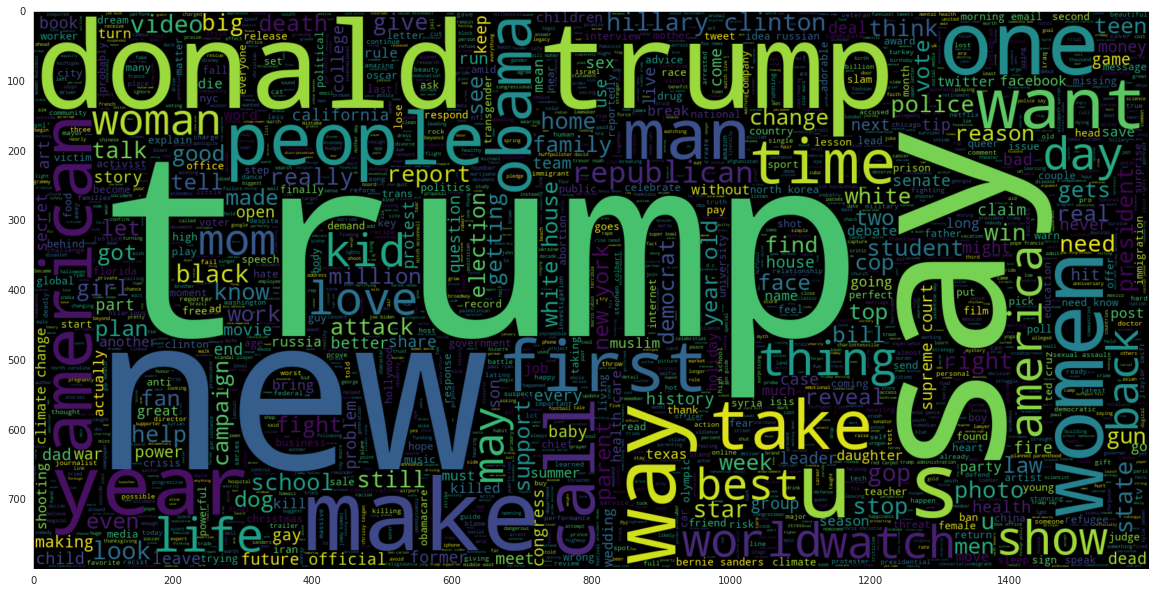

In [19]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR SARCASTIC TEXT (LABEL - 1)**

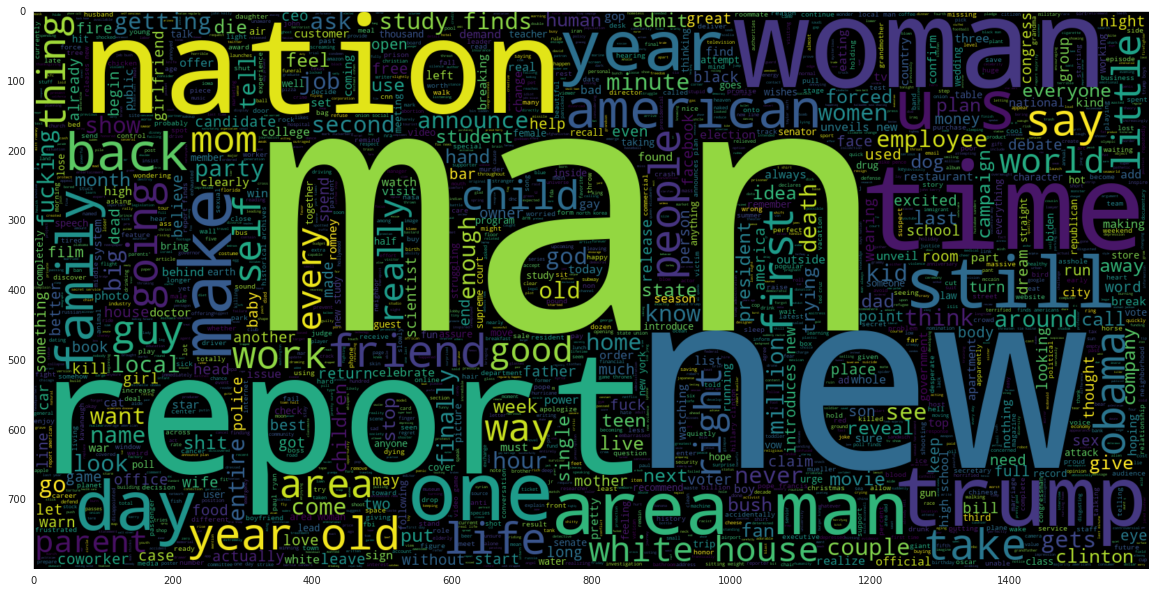

In [20]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

**Number of characters in texts**

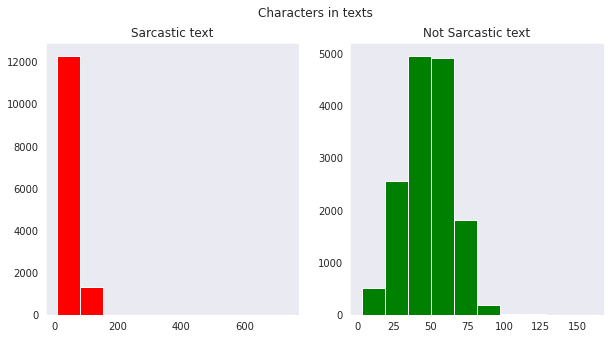

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

**Number of words in each text**

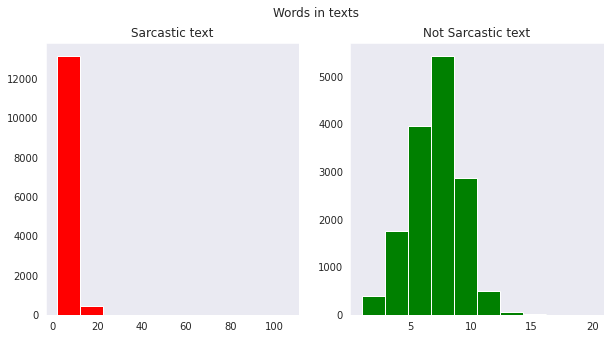

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

**Average word length in a text**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

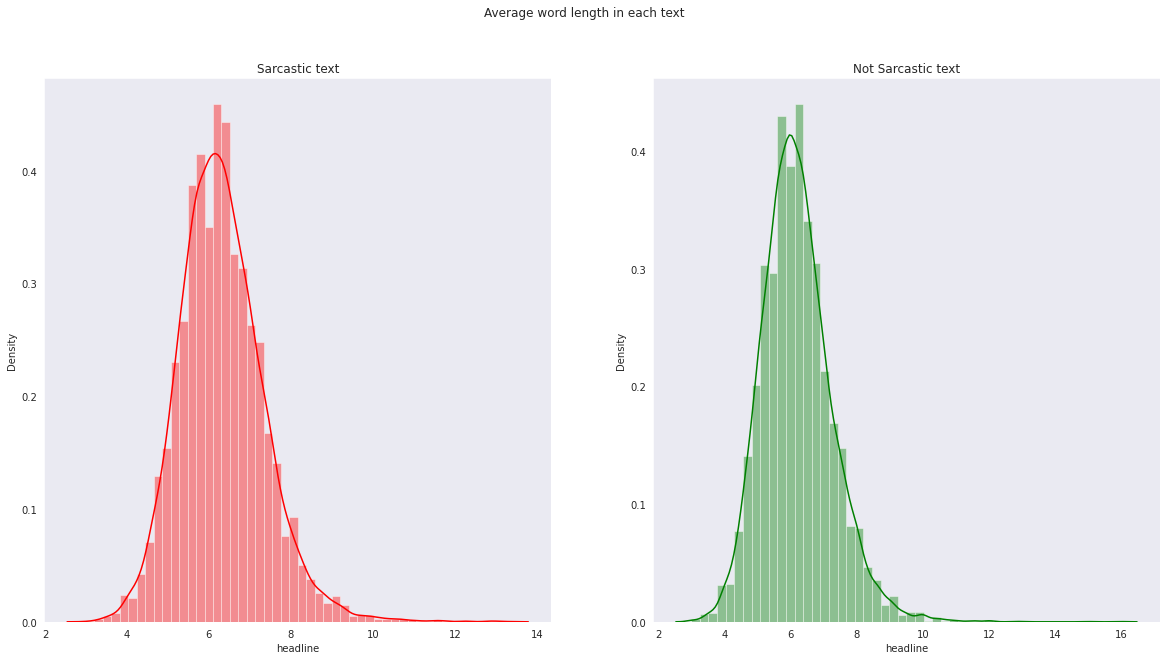

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

**Converting text to format acceptable by gensim**

In [9]:
words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  "'streaming'",
  'correctly']]

In [10]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200


In [11]:


#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [12]:
#vocab size
len(w2v_model.wv)
#We have now represented each of 38071 words by a 100dim vector.

38071

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = pad_sequences(tokenized_train, maxlen = 20)

In [47]:
import pickle
# saving tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
vocab_size = len(tokenizer.word_index) + 1

In [16]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [17]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model.wv, tokenizer.word_index)

<h1  id="7" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> TRAINING WORD2VEC MODEL </h1>


In [18]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           7614400   
                                                                 
 bidirectional (Bidirectiona  (None, 20, 256)          336896    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,007,041
Trainable params: 8,007,041
Non-trainable params: 0
_________________________________________________________________


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0) 

In [21]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
157/157 [==============================] - 740s 3s/step - loss: 0.5299 - acc: 0.7107 - val_loss: 0.4100 - val_acc: 0.8117
Epoch 2/3
157/157 [==============================] - 267s 2s/step - loss: 0.2133 - acc: 0.9144 - val_loss: 0.4612 - val_acc: 0.8104
Epoch 3/3
157/157 [==============================] - 445s 3s/step - loss: 0.0730 - acc: 0.9731 - val_loss: 0.5959 - val_acc: 0.8000


In [28]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

627/627 [==============================] - 238s 378ms/step - loss: 0.0285 - acc: 0.9927
Accuracy of the model on Training Data is -  99.27120208740234
269/269 [==============================] - 15s 57ms/step - loss: 0.5959 - acc: 0.8000
Accuracy of the model on Testing Data is -  80.00233173370361


In [41]:
print(y_train[0])

1


In [30]:
y_pred = model.predict(x_test)

269/269 [==============================] - 15s 46ms/step


In [54]:
x_test.shape

(8586, 20)

In [52]:
y_pred.shape

(8586, 1)

In [49]:
print(x_test)

[[    0     0     0 ...    40   395  2349]
 [    0     0     0 ...  5263  2448  3404]
 [    0     0     0 ...  9031  7954   831]
 ...
 [    0     0     0 ...   375  2043 17578]
 [    0     0     0 ...  5263  7529 28756]
 [    0     0     0 ...  1026   158   108]]


In [53]:
print(y_pred[0])

[0.9986483]


In [46]:
model.save('model.h5')

**This is the Updated Version of Sarcasm Detection with GloVe/Word2Vec(83%Accuracy). I have updated the notebook with notes and some technical Error.**

[Link of the Notebook ](https://www.kaggle.com/code/madz2000/sarcasm-detection-with-glove-word2vec-83-accuracy)